In [1]:
cd ..

/home/janek/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *

In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 15
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)

trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

In [6]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 10
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)

trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size, not_nn_loss_weight=100, and_nn_loss_weight=250)

train epoch 00/15 | batch 2001/2000 | loss 4.2829 | val loss 2.9880 | acc 0.2104 | f1 0.3405 | prec 0.2071 | recall 0.9563 | roc auc 0.4361 | pr auc 0.1918 | elapsed 42.70s
train epoch 01/15 | batch 2001/2000 | loss 3.0098 | val loss 1.3219 | acc 0.7903 | f1 0.0317 | prec 1.0000 | recall 0.0161 | roc auc 0.5438 | pr auc 0.3248 | elapsed 98.64s
train epoch 02/15 | batch 2001/2000 | loss 2.6744 | val loss 0.8484 | acc 0.8139 | f1 0.2435 | prec 0.9124 | recall 0.1405 | roc auc 0.6763 | pr auc 0.4657 | elapsed 107.10s
train epoch 03/15 | batch 2001/2000 | loss 3.1975 | val loss 0.6840 | acc 0.8227 | f1 0.3333 | prec 0.8391 | recall 0.2079 | roc auc 0.7484 | pr auc 0.5513 | elapsed 96.54s
train epoch 04/15 | batch 2001/2000 | loss 3.3680 | val loss 0.5628 | acc 0.8452 | f1 0.5007 | prec 0.8008 | recall 0.3642 | roc auc 0.8184 | pr auc 0.6624 | elapsed 86.66s
train epoch 05/15 | batch 2001/2000 | loss 3.1218 | val loss 0.4638 | acc 0.8819 | f1 0.6519 | prec 0.8770 | recall 0.5188 | roc auc 0

In [ ]:
train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size, not_nn_loss_weight=100, and_nn_loss_weight=250, train_only_and=True)

In [ ]:
train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=5, batch_size=batch_size, not_nn_loss_weight=100, and_nn_loss_weight=250)

In [7]:
input = T.rand(10)
print(input)
output = trained_reasoner.not_nn(trained_reasoner.not_nn(input))
print(output)
print(F.mse_loss(input, output))

tensor([0.8122, 0.3115, 0.3037, 0.5731, 0.7445, 0.2605, 0.7648, 0.3529, 0.7077,
        0.0851])
tensor([0.8132, 0.3103, 0.3061, 0.5742, 0.7459, 0.2602, 0.7657, 0.3534, 0.7086,
        0.0852], grad_fn=<SqueezeBackward3>)
tensor(1.3303e-06, grad_fn=<MseLossBackward0>)


In [8]:
input1 = T.rand(10)
print(input)
print(trained_reasoner.and_nn(im_mod( input, input)))
F.mse_loss(input, trained_reasoner.and_nn(im_mod(input, input)))

tensor([0.8122, 0.3115, 0.3037, 0.5731, 0.7445, 0.2605, 0.7648, 0.3529, 0.7077,
        0.0851])
tensor([ 0.7005,  0.0241,  0.1179,  0.2376,  0.6181,  0.1327,  0.4335,  0.4325,
         0.7197, -0.1460], grad_fn=<AddBackward0>)


tensor(0.0444, grad_fn=<MseLossBackward0>)

In [9]:
print(input)
print(trained_reasoner.bot_concept[0])
print(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.bot_concept[0], input)), trained_reasoner.bot_concept[0]))

tensor([0.8122, 0.3115, 0.3037, 0.5731, 0.7445, 0.2605, 0.7648, 0.3529, 0.7077,
        0.0851])
tensor([ 0.4456, -0.1688,  0.6530,  0.5990, -0.0113, -0.5986, -0.0646,  0.2478,
         0.4840, -0.0696], grad_fn=<SelectBackward0>)
tensor([ 0.3079, -0.0321,  0.0875,  0.2093,  0.2946,  0.2619,  0.0522,  0.1583,
         0.3758, -0.2211], grad_fn=<AddBackward0>)
tensor(0.1400, grad_fn=<MseLossBackward0>)


In [10]:
print(input)
print(trained_reasoner.top_concept[0])
print(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)))
print(F.mse_loss(trained_reasoner.and_nn(im_mod(trained_reasoner.top_concept[0], input)), input))


tensor([0.8122, 0.3115, 0.3037, 0.5731, 0.7445, 0.2605, 0.7648, 0.3529, 0.7077,
        0.0851])


tensor([ 0.1674,  0.1728,  0.1547,  0.1035, -0.3820, -0.1028, -0.7604, -0.2130,
         0.3414,  0.4885], grad_fn=<SelectBackward0>)
tensor([ 0.5595, -0.4390,  0.5761,  0.4109,  0.4837, -0.1357, -0.0138,  0.3952,
         0.4994,  0.0032], grad_fn=<AddBackward0>)
tensor(0.1611, grad_fn=<MseLossBackward0>)


In [11]:
trained_reasoner.not_nn.weight

Parameter containing:
tensor([[-0.3401,  0.3233,  0.5678, -0.1460,  0.0994, -0.1989,  0.2795,  0.4130,
          0.0541,  0.1469],
        [ 0.4420, -0.0807,  0.1351, -0.1327,  0.4238,  0.1005,  0.3583,  0.2926,
          0.4138, -0.5755],
        [ 0.6843,  0.0229,  0.5325,  0.4545, -0.0583,  0.0805, -0.2919,  0.0320,
         -0.0776,  0.0200],
        [-0.1238, -0.1649,  0.4770, -0.1480,  0.2629,  0.1177,  0.0786, -0.6963,
         -0.2485, -0.0867],
        [ 0.0293,  0.3451, -0.1879,  0.3247, -0.2141, -0.2176,  0.4229, -0.4816,
          0.4710,  0.2318],
        [-0.3195,  0.3291,  0.0368,  0.0707, -0.2605,  0.9102,  0.0426, -0.0478,
          0.0042,  0.1783],
        [ 0.2514,  0.4161, -0.2997,  0.1786,  0.3587,  0.1221,  0.3779,  0.0669,
         -0.5355,  0.2031],
        [ 0.4071,  0.1385,  0.0386, -0.7588, -0.4941,  0.0669,  0.0527, -0.1027,
         -0.1227,  0.1087],
        [ 0.0121,  0.4647, -0.0563, -0.2785,  0.5173,  0.1487, -0.6262, -0.1391,
          0.3081,  0.2230

In [12]:
print(T.round(T.matmul( trained_reasoner.not_nn.weight, trained_reasoner.not_nn.weight)*100)/100)

tensor([[1., 0., 0., -0., -0., 0., 0., 0., -0., 0.],
        [-0., 1., -0., 0., -0., -0., -0., -0., -0., 0.],
        [0., 0., 1., 0., -0., 0., 0., 0., -0., 0.],
        [-0., -0., 0., 1., 0., 0., 0., 0., -0., 0.],
        [0., -0., 0., -0., 1., -0., 0., 0., -0., -0.],
        [-0., -0., 0., -0., -0., 1., 0., 0., -0., -0.],
        [-0., -0., 0., -0., 0., 0., 1., 0., -0., -0.],
        [-0., -0., 0., -0., 0., 0., 0., 1., 0., -0.],
        [0., -0., 0., -0., 0., -0., -0., 0., 1., -0.],
        [-0., 0., -0., 0., -0., 0., 0., 0., -0., 1.]], grad_fn=<DivBackward0>)


In [13]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger, not_nn_loss_weight=0.1)
    #else:
        #train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner


train epoch 00/10 | batch 1251/1250 | loss 1.4938 | val loss 1.4932 | acc 0.6734 | f1 0.3914 | prec 0.3289 | recall 0.4831 | roc auc 0.6379 | pr auc 0.4699 | elapsed 36.57s
train epoch 01/10 | batch 1251/1250 | loss 1.2863 | val loss 1.0442 | acc 0.7496 | f1 0.4725 | prec 0.4358 | recall 0.5159 | roc auc 0.7221 | pr auc 0.5495 | elapsed 53.93s
train epoch 02/10 | batch 1251/1250 | loss 0.9120 | val loss 0.7465 | acc 0.8158 | f1 0.5721 | prec 0.5779 | recall 0.5665 | roc auc 0.8047 | pr auc 0.6534 | elapsed 55.91s
train epoch 03/10 | batch 1251/1250 | loss 0.6695 | val loss 0.5639 | acc 0.8670 | f1 0.6756 | prec 0.7194 | recall 0.6368 | roc auc 0.8701 | pr auc 0.7590 | elapsed 52.91s
train epoch 04/10 | batch 1251/1250 | loss 0.5244 | val loss 0.4574 | acc 0.9011 | f1 0.7534 | prec 0.8221 | recall 0.6954 | roc auc 0.9126 | pr auc 0.8364 | elapsed 49.48s
train epoch 05/10 | batch 1251/1250 | loss 0.4381 | val loss 0.3924 | acc 0.9230 | f1 0.8070 | prec 0.8867 | recall 0.7405 | roc auc 0.

In [14]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
   # _, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240628T170242


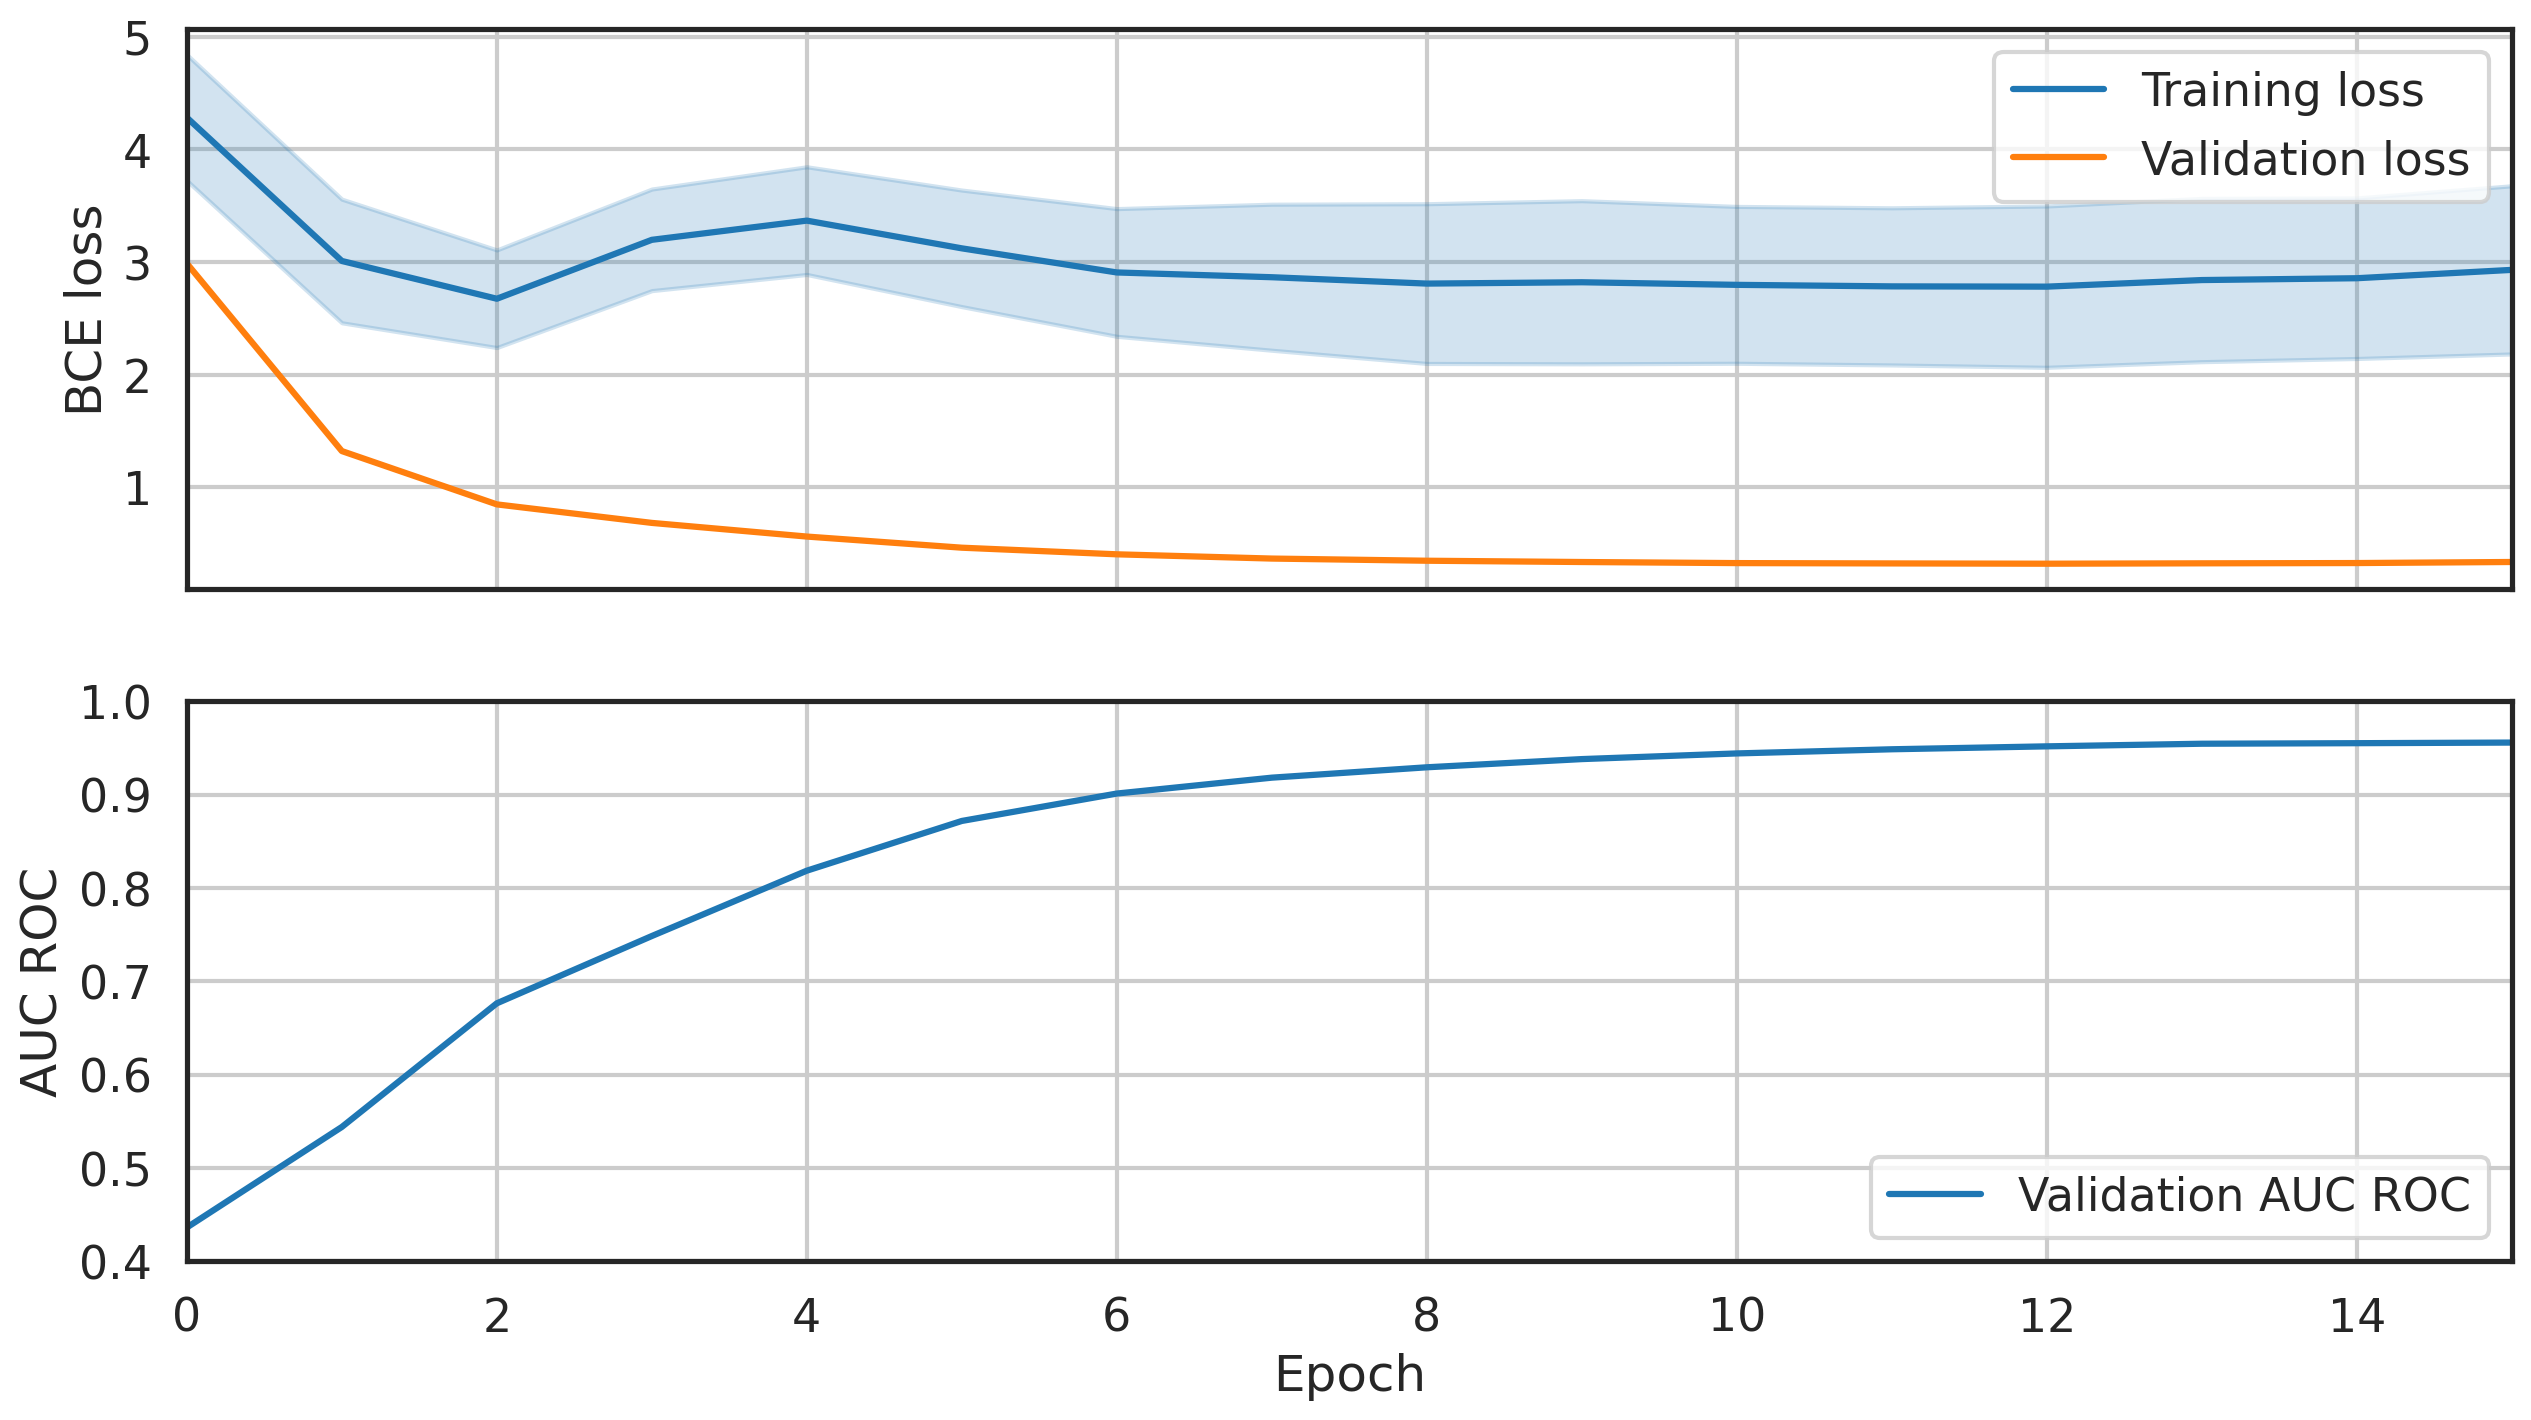

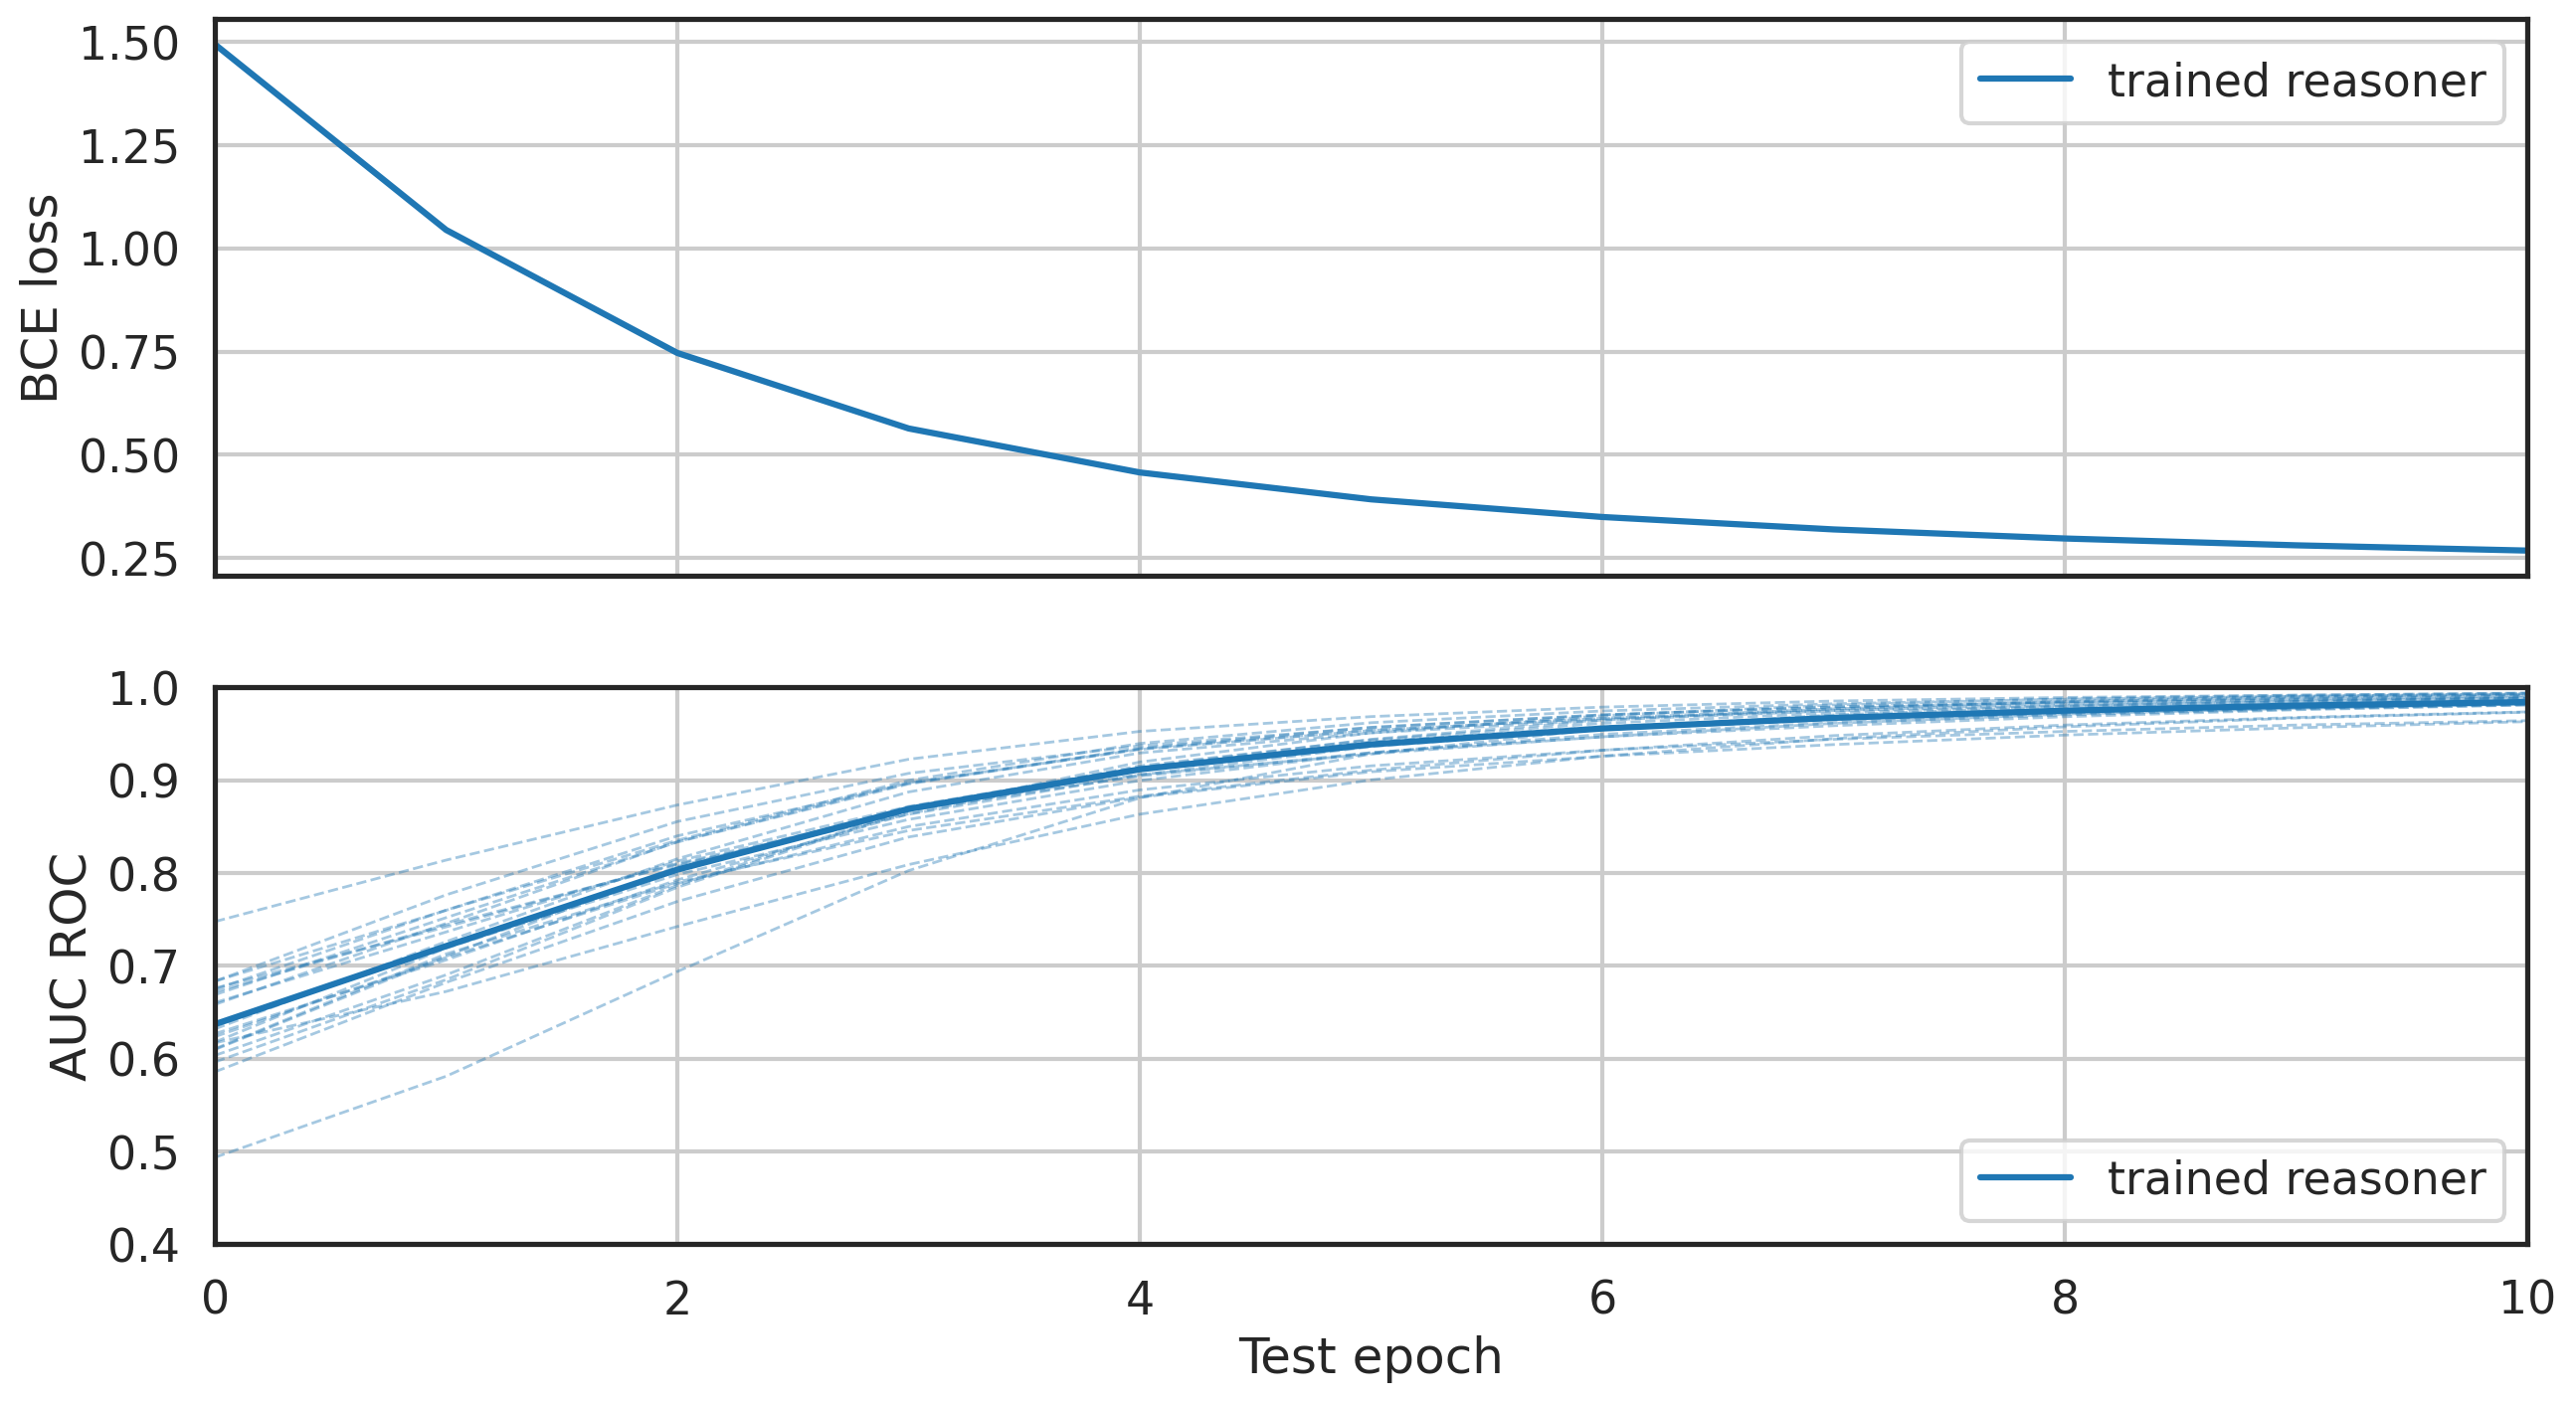

             mean       std     micro
acc      0.963050  0.014124  0.963050
prec     0.962702  0.024103  0.963048
recall   0.861989  0.043770  0.863155
f1       0.909321  0.033962  0.910370
auc_roc  0.984109  0.009352  0.985127
auc_pr   0.965126  0.019629  0.967586


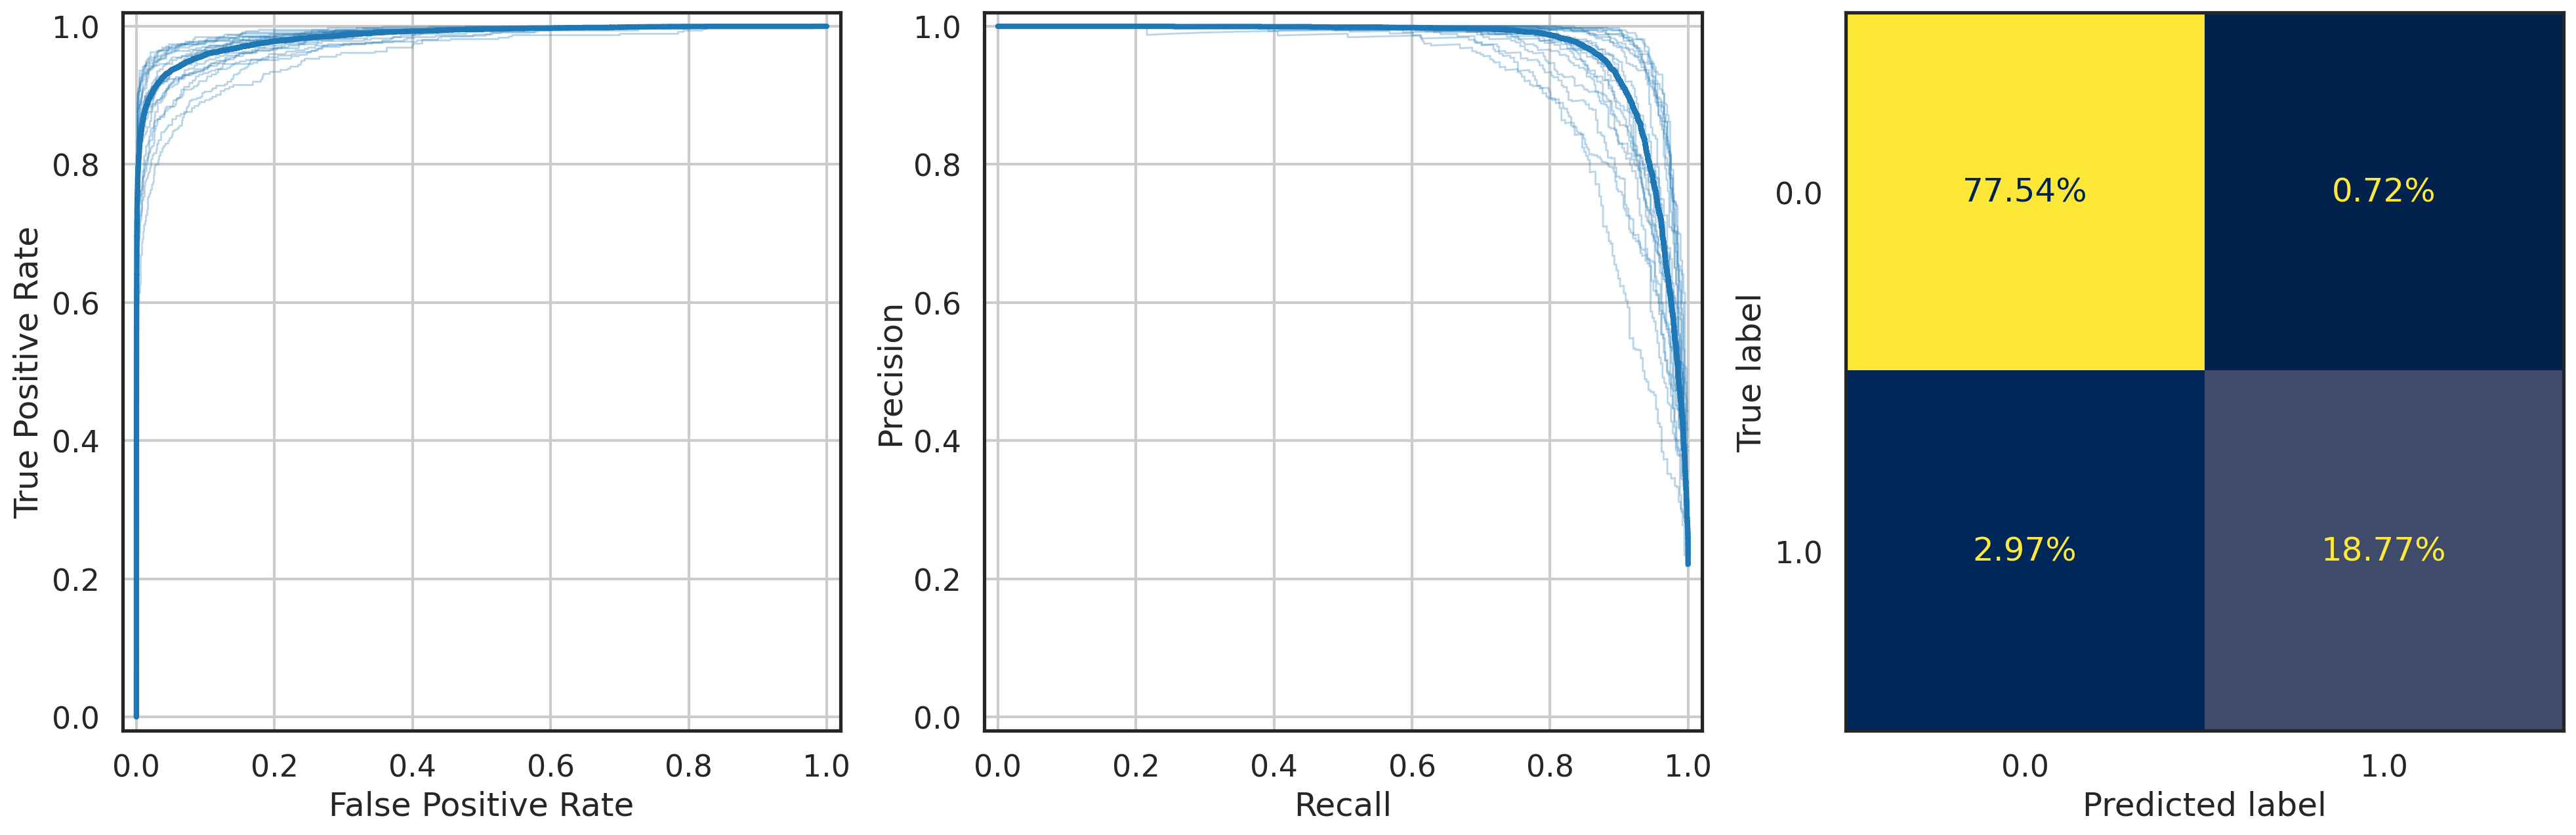

In [15]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good))#, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
#print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))